In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time

In [40]:
class uniform:
    def __init__(self,a,b,N):
        self.a=a
        self.b=b
        self.N=N
        self.wynik=[]
    def gen(self,M,N):
        #generator liczb pseudolosowych z zakresu 1...M;
        #N to liczba generowanych wartości
        m = 32416187567
        a_i = [17,29,53];
        p_i = [97,23,111];
        t = time.time()
        t = time.time()
        a=time.time()
        a=str(a)
        b=a[-1]
        b=int(b)
        c=a[-2]+a[-1]
        c=int(c)
        d=a[-3]
        if d==".":
            d=0
        d=int(d)
        
        x_i = [b,c,d]
        k = len(a_i)
        wynik = []
        for i in range(N):
            x=0
            for j in range(k):
                x += a_i[j]*(x_i[j]**p_i[j])
            x = math.floor(x % m % M)
            x_i.append(x)
            x_i.pop(0)
            wynik.append(x)    
        return wynik
    def jedno(self):
        M=10000000000000000;
        c=self.gen(M,self.N)
        m=32416187567
        m=m*np.ones((1,self.N))
        x=((c%m))/m*(self.b-self.a)+self.a
        self.wynik=x[0]
    def zw_wynik(self):
        self.jedno()
        return self.wynik

In [28]:
def funkcja(liczby): #funkcja ktora całkujemy x1+x2+...+xn
    suma=0
    for i in liczby:
        suma+=i
    return suma

In [29]:
def policzenie_calki(n,przedzial,funkcja,N): #metoda monte carlo, n-ile wymiarow, przedział-przedział, po ktorym całkujemy

    wynik_sredni=[]
    
    for i in range(0, N): #N-dokładnosc, ile prób

        liczby=[] #liczby z ktorych wywołamy funkcje
        iloczyn=[] #to czym trzeba pomnożyć

        for i in range(0,len(przedzial),2): #idziemy po poszczegolnych przedziałach
            p=[przedzial[i],przedzial[i+1]] #przedzial po jakim całkujemy dla i-tego wymiaru
            u1=uniform(p[0],p[1],1) #liczba z tego przedziału
            u=u1.zw_wynik()[0]
            liczby.append(u)
            
        wynik_sredni.append(funkcja(liczby))
        

    wynik_sredni=sum(wynik_sredni)/N

    iloczyn=1

    for i in range(0,n,2):
        iloczyn=iloczyn*(przedzial[i+1]-przedzial[i])

    wynik_sredni=wynik_sredni*iloczyn

    return wynik_sredni

In [30]:
#przedział [1,2]x[3,4] podajemy [1,2,3,4]

###############################################################################################

# sprawdzenie metody-wykresy

def rysuj(n,wymiar,wynik,przedzial):
    wyniki=[]
    for i in n:
        wyniki.append(policzenie_calki(wymiar,przedzial,funkcja,i))
    

    wynik=wynik*np.ones(len(wyniki))
    #plt.plot(n,wynik,'r')
    
    plt.plot(n,abs(wyniki-wynik),'b')
    #plt.plot(n,wyniki-wynik,'bo')
    
    plt.title(str(wymiar)+' wymiar')
    #blue_line = mlines.Line2D([], [], color='red',
     #                     markersize=5, label= 'rzeczywista wartość')
    #red_line = mlines.Line2D([], [], color='blue', 
     #                     markersize=5, label='metoda Monte Carlo')
    #plt.legend(handles=[red_line,blue_line],prop={'size':7})
    plt.xlabel('N')
    plt.ylabel('błąd bezwzględny')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Text(0.5,1,'n=1')

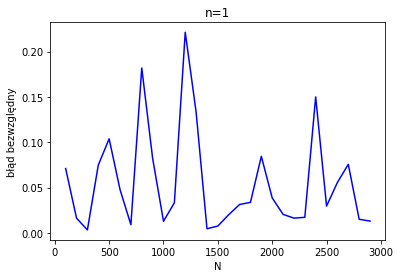

In [32]:
n=np.arange(0,3000,100)
rysuj(n,1,0.5,[0,1])
plt.title('n=1')


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Text(0.5,1,'n=2')

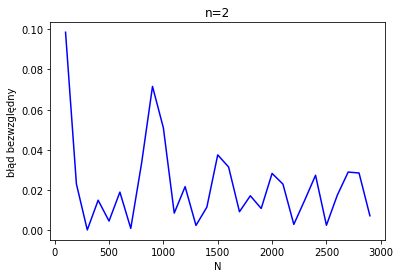

In [43]:
rysuj(n,2,1,[0,1,0,1])
plt.title("n=2")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Text(0.5,1,'n=3')

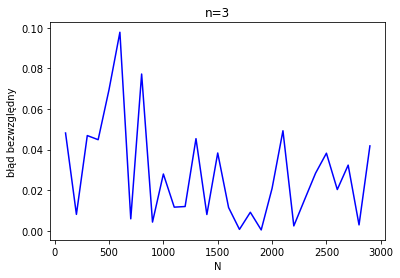

In [42]:
rysuj(n,3,1.5,[0,1,0,1,0,1])
plt.title('n=3')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Text(0.5,1,'n=4')

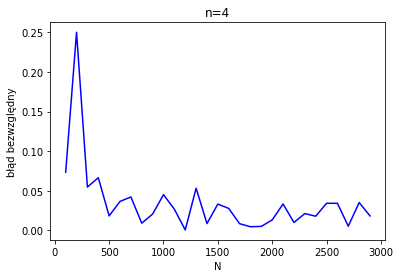

In [38]:
rysuj(n,4,2,[0,1,0,1,0,1,0,1])
plt.title("n=4")

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Text(0.5,1,'n=5')

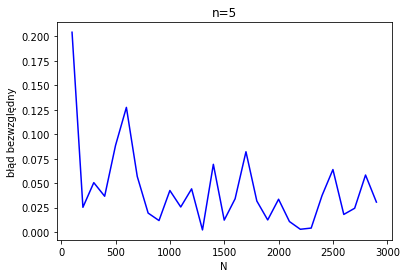

In [41]:
rysuj(n,5,2.5,[0,1,0,1,0,1,0,1,0,1])
plt.title("n=5")
